C:\Users\Jiayin Hu\AppData\Local\Temp\ipykernel_11104\2254407281.py:26: RuntimeWarning: divide by zero encountered in divide
  return kappa(x)/k(x)
C:\Users\Jiayin Hu\AppData\Local\Temp\ipykernel_11104\2254407281.py:32: RuntimeWarning: divide by zero encountered in divide
  return - 1.0 / np.tan(0.5*k(x)*L)   # odd


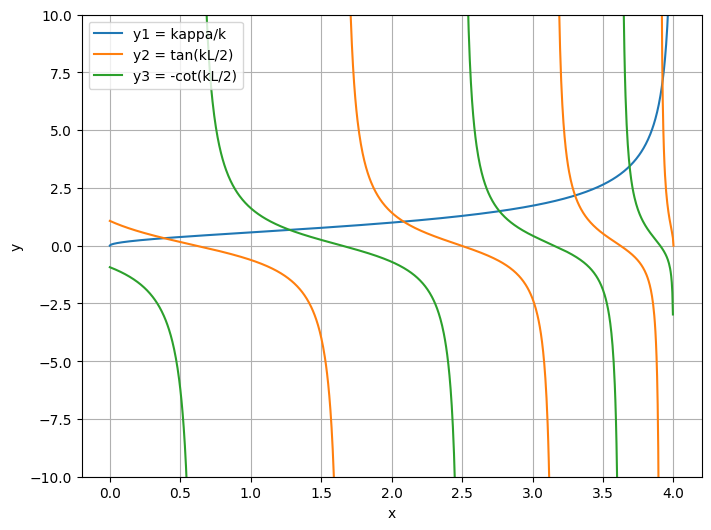

0.09400754065418436
0.37603016261673744
0.8460678658876591
1.5041206504669498
2.350188516354609
3.3842714635506366
4.606369492055033
6.016482601867799
7.614610792988934


In [21]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import scipy.constants

# define the constants
hbar = scipy.constants.hbar
e = scipy.constants.elementary_charge
m = scipy.constants.electron_mass
ev = scipy.constants.electron_volt
V0 = 4.0 * ev
L = 2.0e-9
pi = scipy.constants.pi

def k(x):
    return np.sqrt(2.0*m*(-x*ev+V0))/hbar

def kappa(x):
    return np.sqrt(2.0*m*x*ev)/hbar

# Define the two functions
def f1(x):
    return kappa(x)/k(x)

def f2(x):
    return np.tan(0.5*k(x)*L)   # even

def f3(x):
    return - 1.0 / np.tan(0.5*k(x)*L)   # odd


# Define a function that returns the difference between the two functions
def even_eq(x):
    return f1(x) - f2(x)

def odd_eq(x):
    return f1(x) - f3(x)

# Define the range of x-values to scan
x_range = np.linspace(0, 4.0, 1000)


y1 = f1(x_range)
y2 = f2(x_range)
y2[:-1][np.diff(y2) > 0] = np.nan
y3 = f3(x_range)
y3[:-1][np.diff(y3) > 0] = np.nan

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(x_range, y1, label='y1 = kappa/k')
plt.plot(x_range, y2, label='y2 = tan(kL/2)')
plt.plot(x_range, y3, label='y3 = -cot(kL/2)')

plt.ylim(-10, 10)

# Add labels and a legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Find the solutions
# initials = np.linspace(1.0, 4.0, 20)
# for x in initials:
#     even_x = fsolve(odd_eq, x0=x)
#     print(-even_x+4.0)

for n in range(1,10):
    En = (n*pi*hbar/L)**2/(2*m)
    En = En / ev
    print(En)


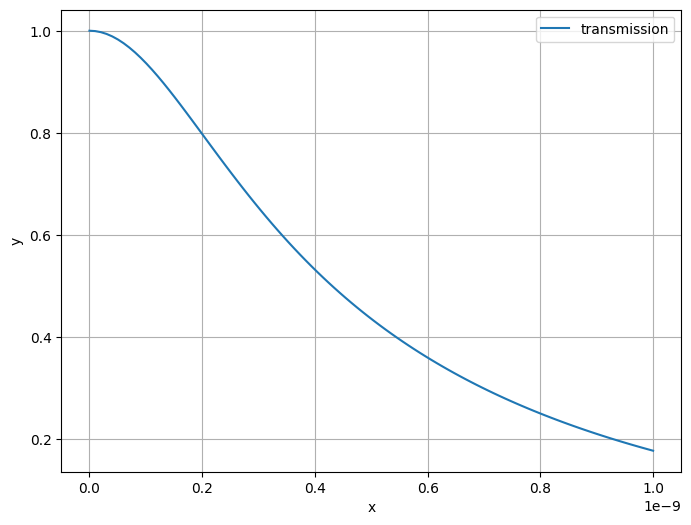

In [30]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import scipy.constants
import cmath


# define the constants
hbar = scipy.constants.hbar
e = scipy.constants.elementary_charge
m = scipy.constants.electron_mass
ev = scipy.constants.electron_volt
V0 = 2.0 * ev
E = 1.9 * ev
L = 2.0e-9
pi = scipy.constants.pi


kappa = cmath.sqrt(2.0*m*(E-V0))/hbar
k = np.sqrt(2.0*m*E)/hbar

x_range = np.linspace(0, 10.0e-10, 100)
def F(x):
    return (4.0*k*kappa*cmath.exp(-1j*k*x))/((k+kappa)**2*cmath.exp(-1j*kappa*x)-(k-kappa)**2*cmath.exp(1j*kappa*x))
t = []
for x in x_range:
    t.append(np.abs(F(x)))
# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(x_range, t, label='transmission')

# Add labels and a legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()




In [26]:
SPCVNPDSWTFSBAHA

(8.659560562354934e-17+1.4142135623730951j)
